В цьому домашньому завданні ми знову працюємо з даними з нашого змагання ["Bank Customer Churn Prediction (DLU Course)"](https://www.kaggle.com/t/7c080c5d8ec64364a93cf4e8f880b6a0).

Тут ми побудуємо рішення задачі класифікації з використанням Decision Trees і зробимо новий submission на змагання на Kaggle.

В цьому ДЗ ми працюємо без pipelines, бо так буде зручніше для візуалізації і інтерпретації моделі дерева прийняття рішень. Так буває і в робочих проєктах: іноді зручніше використати sklearn.Pipelines, іноді зручніше без них. На етапі пошуку рішення (research) зручніше без пайплайнів, а з пайплайнами - коли ви відлагодили процес обробки даних і хочете поекспериментувати з різними моделями і гіперпараметрами.

**Завдання 1.**

У попередньому домашньому завданні, `HW 2.7 Логістична регресія з scikit learn.ipynb`, ми писали обробку даних для змагання. Ваше завдання зараз - за прикладом, наведеним в лекції `Майстер-клас з перенесення коду з jupyter notebook у Python модуль`, перенести попередню обробку сирих даних з вашого розв'язку ДЗ 2.7 у файл `process_bank_churn.py` в функцію `preprocess_data(...)`.

Функція `preprocess_data()` має приймати `raw_df` і вертати `X_train`, `train_targets`, `X_val`, `val_targets`, `input_cols`(перелік назв колонок, які Ви використовуєте в X), `scaler`, `encoder`, які ми потім будемо використовувати для тренування дерева прийняття рішень.


### Кроки попередньої обробки:

1. Обираємо колонки для роботи. В цьому завдання для чистоти експериментів рекомендую прибрати колонку `Surname`, так буде простіше інтрепретувати модель. Ви можете її додати вже за самостійних подальших експериментів.
2. Розбиття сирих даних на тренувальні і валідаційні.
3. Обробка категоріальних даних (one hot encoding).
4. Масштабування числових даних (було частиною попередньої обробки в попередніх завданнях). Для дерев нам не обовʼязково масштабувати ознаки, тож в коді можна зробити цю частину опціональною, додавши в `preprocess_data` параметр `scaler_numeric`, який приймає значення `True` або `False`. Це дозволить використовувати код попередньоъ обробки з різними моделями.


### Інструкції:
1. Перенесіть попередню обробку даних у файл `process_bank_churn.py`.
2. Забезпечте модулярну структуру функцій: кожна функція повинна виконувати лише одну дію, наприклад, масштабувати ознаки.
3. Додайте докстрінги до кожної функції.
4. Використовуйте typing для аргументів та значень, що повертаються функціями.
5. Передбачте обробку нових даних. Додайте спеціальну функцію `preprocess_new_data(...)`, яка приймає на вхід нові дані в вигляді pandas DataFrame та використовує вже навчені скейлер та енкодер (передані теж як аргументи фукнціх) для їх обробки. Ця функція буде корисною для обробки нових даних перед передбаченням або оцінкою моделі, коли оброблятимемо `test.csv`.

Можна і рекомендовано виконувати це завдання з ChatGPT (бажано, новіше, ніж 3.5) як було наведено у відео-прикладі, тільки **ваше додаткове завдання - розібратись з кодом, який вам згенерувала мовна модель :)**.

## В результаті цього завдання

1. Завантажте ваш готовий `process_bank_churn.py` файл на GitHub у свій репозиторій.
2. Додайте посилання на файл в репозиторії тут у ноутбуці.
3. Нижче зробіть імпорт функції `preprocess_data` з вашого модуля `process_bank_churn.py`.



In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

path = "../../../data/"

df_train_raw = pd.read_csv(path + "train.csv")

In [25]:
from process_bank_churn import preprocess_data, preprocess_new_data

preprocessed_data = preprocess_data(df_train_raw, scaler_numeric=False)
display(preprocessed_data['train_X'].head(),  preprocessed_data['val_X'].head())

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Male
7180,682.0,30.0,1.0,131394.56,1.0,1.0,1.0,143952.24,1.0,0.0,0.0,1.0
10393,684.0,39.0,2.0,178058.06,1.0,1.0,0.0,145518.31,1.0,0.0,0.0,0.0
80,705.0,35.0,6.0,116320.68,2.0,1.0,0.0,174431.01,0.0,1.0,0.0,1.0
3365,669.0,58.0,0.0,0.00,2.0,0.0,1.0,51565.98,0.0,0.0,1.0,1.0
12236,707.0,21.0,3.0,0.00,2.0,1.0,1.0,148564.76,1.0,0.0,0.0,1.0


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Male
6490,714.0,46.0,1.0,115764.32,4.0,1.0,1.0,72945.32,0.0,1.0,0.0,1.0
3646,593.0,41.0,5.0,0.00,2.0,1.0,1.0,38196.24,1.0,0.0,0.0,1.0
5306,731.0,38.0,2.0,0.00,2.0,0.0,1.0,116971.05,1.0,0.0,0.0,0.0
652,673.0,43.0,4.0,155739.76,1.0,0.0,1.0,111622.76,1.0,0.0,0.0,0.0
2627,678.0,30.0,4.0,0.00,2.0,1.0,0.0,143681.85,0.0,0.0,1.0,0.0


## Висновки 1

- За допомогою ChatGPT та Рerplexity було сформовано .ру файл 
- Замість набору колонок *input_cols* з функції повертають окремо encoded_cols та numeric_cols (аби забезпечити адекватну роботу функції preprocess_new_data для scaler та encoder). За необхідності ми можемо об'єднати еncoded_cols + numeric_cols аби отримати перелік всіх input_cols
- Також абм переконатися що всі функції працюють як треба - виведемо перші 5 рядків тренувального та валідаційного сетів. Перевіремо з виводами після препроцесінгу з попередніми дз -> результати співпадають, ніякий крок не було пропущено. 

**Завдання 2.**
1. Натренуйте дерево прийняття рішень з зафіксованим `random_state` і з рештою аргументів за замовченням.
2. Виведіть area under ROC для моделі на тренувальних і тестувальних даних. Нам потрібна ця метрика, бо вона основна в змаганні. Модель ок, чи є пере- або недотренування?
3. Виведіть глибину дерева.
4. Побудуйте дерево до глибини 2 включно. Напишіть, які ознаки бачите, що є найвпливовішими тут?
5. Створіть датафрейм `importance_df` з feature importances, де в першому стовпчику `feature` - назва ознаки з нашого Х, а в другому `importance` - значення, наскільки ця ознака є важливою в побудованій моделі. Виведіть топ 10 найвпливовіших ознак разом з їх скором важливості (можна або у вигляді таблиці, або в вигляді barplot).

In [26]:
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report

model = DecisionTreeClassifier(random_state = 42)
model.fit(preprocessed_data['train_X'], preprocessed_data['train_y'])

prob_train =  model.predict_proba(preprocessed_data['train_X'])[:,1]
prob_val =  model.predict_proba(preprocessed_data['val_X'])[:,1]

auc_train = roc_auc_score(preprocessed_data['train_y'], prob_train)
auc_val = roc_auc_score(preprocessed_data['val_y'], prob_val)

print(f"Train AUC: {auc_train}, Validation AUC: {auc_val}") #overfitting
print(f'Depth of the tree: {model.get_depth()}')

Train AUC: 1.0, Validation AUC: 0.773859661156458
Depth of the tree: 26


[Text(0.5, 0.875, 'Age <= 43.5\ngini = 0.324\nsamples = 12000\nvalue = [9558, 2442]'),
 Text(0.25, 0.625, 'NumOfProducts <= 1.5\ngini = 0.188\nsamples = 9661\nvalue = [8647, 1014]'),
 Text(0.125, 0.375, 'Age <= 39.5\ngini = 0.341\nsamples = 3664\nvalue = [2866, 798]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'NumOfProducts <= 2.5\ngini = 0.069\nsamples = 5997\nvalue = [5781, 216]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'NumOfProducts <= 1.5\ngini = 0.476\nsamples = 2339\nvalue = [911, 1428]'),
 Text(0.625, 0.375, 'IsActiveMember <= 0.5\ngini = 0.343\nsamples = 1481\nvalue = [325, 1156]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'NumOfProducts <= 2.5\ngini = 0.433\nsamples = 858\nvalue = [586, 272]'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0.9375, 0.125, '\n  (...)  \n')]

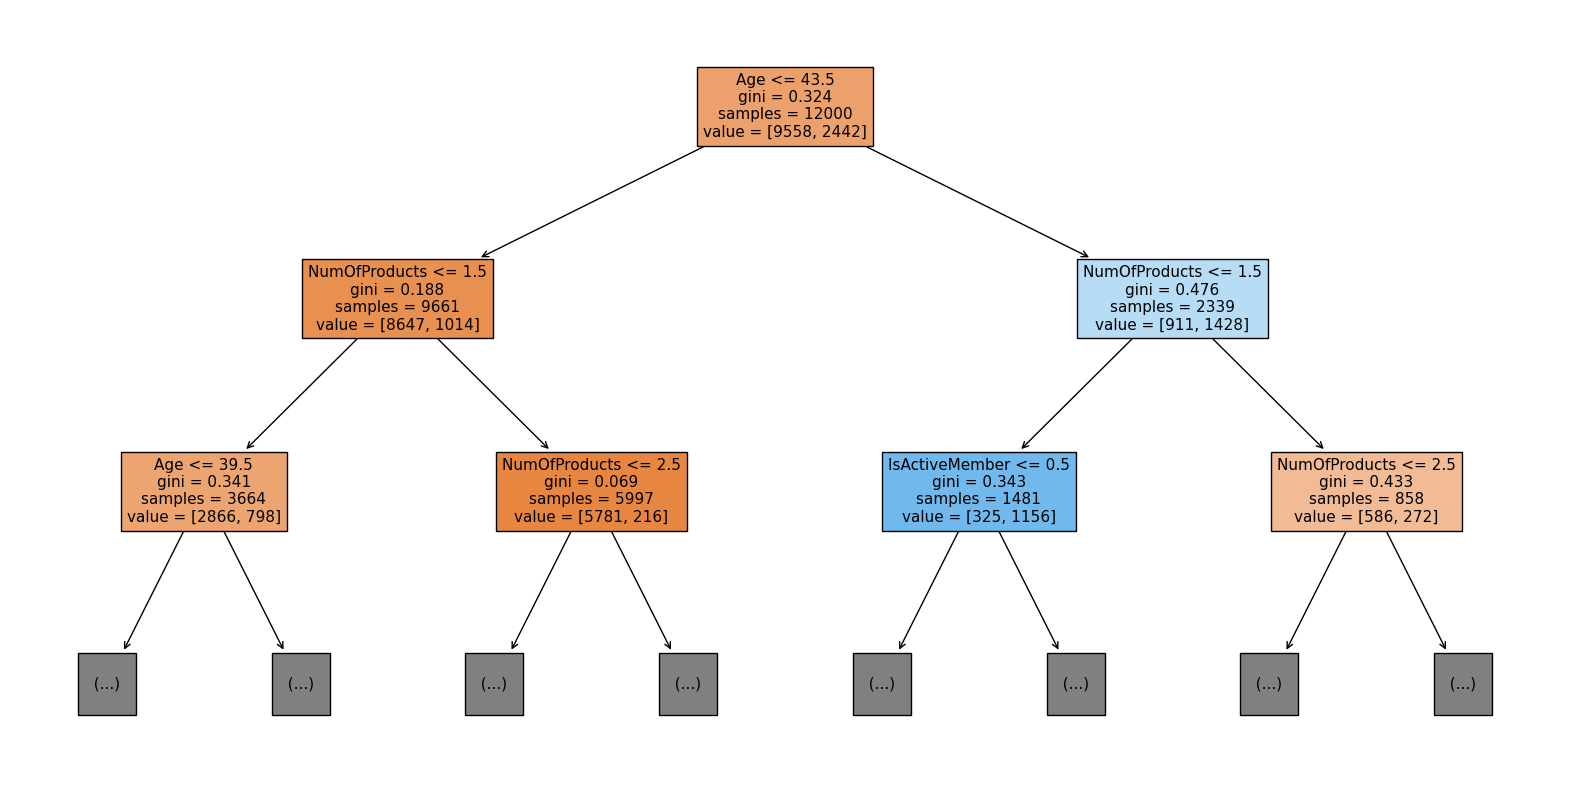

In [ ]:
from matplotlib import pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(model, feature_names=list(preprocessed_data['train_X'].columns), filled=True, max_depth=2)

In [ ]:
impotents = model.feature_importances_
df_important = pd.DataFrame({'feature': preprocessed_data['train_X'].columns, 'importance': impotents})
df_important.sort_values('importance', ascending=False).iloc[:10]

,feature,importance
1,Age,0.356639
4,NumOfProducts,0.168379
7,EstimatedSalary,0.126598
0,CreditScore,0.122589
3,Balance,0.078428
2,Tenure,0.054646
6,IsActiveMember,0.033404
11,Gender_Male,0.017746
9,Geography_Germany,0.015110
5,HasCrCard,0.010435


<Axes: xlabel='importance', ylabel='feature'>

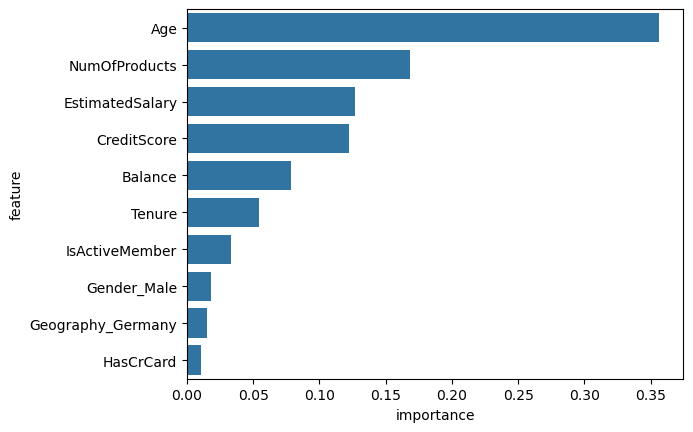

In [ ]:
import seaborn as sns
sns.barplot(x='importance', y='feature', data=df_important.sort_values('importance', ascending=False).iloc[:10], )

In [34]:
model_2 = DecisionTreeClassifier(max_depth=2, random_state = 42)
model_2.fit(preprocessed_data['train_X'], preprocessed_data['train_y'])
prob_train_2 =  model_2.predict_proba(preprocessed_data['train_X'])[:,1]
prob_val_2 =  model_2.predict_proba(preprocessed_data['val_X'])[:,1]
auc_train_2 = roc_auc_score(preprocessed_data['train_y'], prob_train_2)
auc_val_2 = roc_auc_score(preprocessed_data['val_y'], prob_val_2)
print(f"Train AUC: {auc_train_2}, Validation AUC: {auc_val_2}") 

Train AUC: 0.8429075368811715, Validation AUC: 0.8464963303381576


[Text(0.5, 0.8333333333333334, 'Age <= 43.5\ngini = 0.324\nsamples = 12000\nvalue = [9558, 2442]'),
 Text(0.25, 0.5, 'NumOfProducts <= 1.5\ngini = 0.188\nsamples = 9661\nvalue = [8647, 1014]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.341\nsamples = 3664\nvalue = [2866, 798]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.069\nsamples = 5997\nvalue = [5781, 216]'),
 Text(0.75, 0.5, 'NumOfProducts <= 1.5\ngini = 0.476\nsamples = 2339\nvalue = [911, 1428]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.343\nsamples = 1481\nvalue = [325, 1156]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.433\nsamples = 858\nvalue = [586, 272]')]

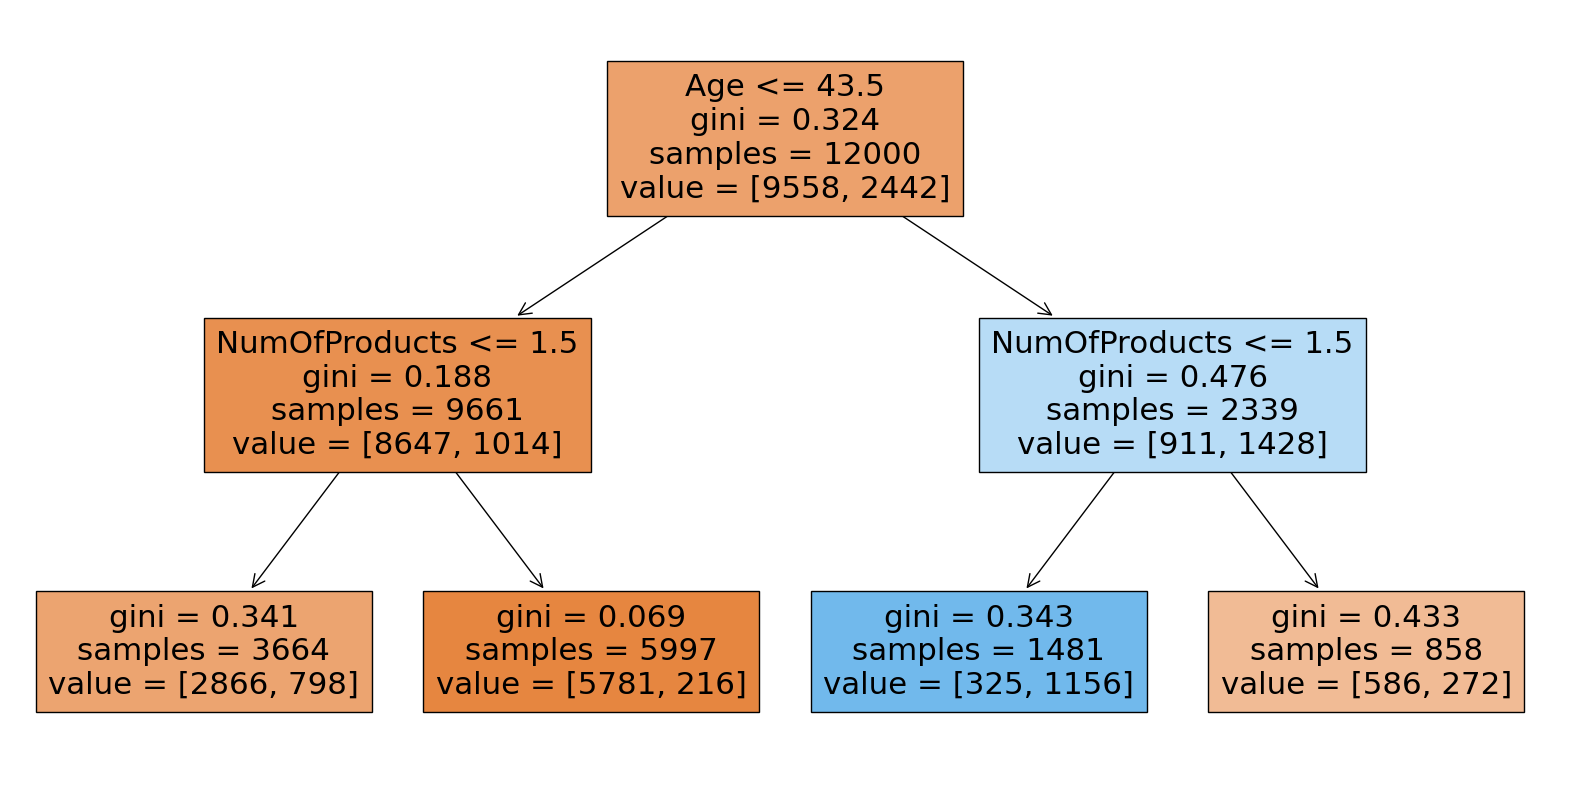

In [35]:
plt.figure(figsize=(20,10))
plot_tree(model_2, feature_names=list(preprocessed_data['train_X'].columns), filled=True)

## Висновки 2

- Ми зафіксували  random_state = 42 та побудували повне дерево прийняття рішень.
- Його глибина вийшла 26 та ми спостерігаємо дуже сильне перетренерування AUC: 1.0, Validation AUC: 0.774. Модель ідеально передбачає тренуванну вибірку, але дуже погано працює на нових даних 

- На основі повної моделі візуалізумо дерево до глибини 2. Бачимо що Age та NumOfProducts відіграють найважливішу роль в моделі. Також окремо побудуємо дерево з обмеженням глибина на 2 -> бачимо аналогічний результат по важливості фіч.
- Навіть на глибині два ми можемо бачити два листа з непоганий розділенням. Для лівого класу (5781 до 216) для правого класу (325 до 1156)



**Завдання 3**. Спробуйте знайти такі параметри моделі `DecisionTree` аби модель генералізувала ліпше (був вищий показник AUROC на валідаційній вибірці). Проекспериментуйте з різними значеннями параметрів `max_leaf_nodes`, `max_depth` та лишіть ті, які дають найкращий результат, разом з відповідними AUROC на тренувальній і валідаційній вибірках.

В цьому завданні спробуйте просто знайти параметри методом "тика" :)

In [ ]:
model_2 = DecisionTreeClassifier(max_depth=15, max_leaf_nodes = 48, random_state = 42)
model_2.fit(preprocessed_data['train_X'], preprocessed_data['train_y'])
prob_train_2 =  model_2.predict_proba(preprocessed_data['train_X'])[:,1]
prob_val_2 =  model_2.predict_proba(preprocessed_data['val_X'])[:,1]
auc_train_2 = roc_auc_score(preprocessed_data['train_y'], prob_train_2)
auc_val_2 = roc_auc_score(preprocessed_data['val_y'], prob_val_2)
print(f"Train AUC: {auc_train_2}, Validation AUC: {auc_val_2}")
print(f'Depth of the tree: {model_2.get_depth()}')
print(f'Number of leaves: {model_2.get_n_leaves()}')

Train AUC: 0.9308878301345345, Validation AUC: 0.9247496398929966
Depth of the tree: 9
Number of leaves: 48


## Висновки 3

- ітераційний підбір привів в нас до точності в Train AUC: 0.9309, Validation AUC: 0.9247 при за визначених параметрах:
    - Depth of the tree: 9
    - Number of leaves: 48
- Це значно покращило модель та вона стала збалансованої та ми уникнули перетренування.
- Підбір параметрів був методом перебору з кроком в 10, як тільки наступний параметр спричиняв зниження Validation AUC, то ми змінювали параметр на 5 вниз (половина від 10). І так ітеративно ділячи відрізки навпів ми прийшли до оптимального набору параметрів

**Завдання 4**. В циклі пройдіться по значенням max_depth від 1 до 20 включно, на кожній ітерації натренуйте DecisionTree модель і виміряйте AUROC на трейн і валідаційних даних.

В кінці виведіть на графік залеєність між AUROC на трейн і валідаційних даних і номером ітерації.

In [ ]:
score = pd.DataFrame(columns=['max_depth', 'train_auc', 'val_auc']) 
for max_depth in range(1, 21):
    model = DecisionTreeClassifier(max_depth=max_depth, random_state = 42)
    model.fit(preprocessed_data['train_X'], preprocessed_data['train_y'])
    prob_train =  model.predict_proba(preprocessed_data['train_X'])[:,1]
    prob_val =  model.predict_proba(preprocessed_data['val_X'])[:,1]
    auc_train = roc_auc_score(preprocessed_data['train_y'], prob_train)
    auc_val = roc_auc_score(preprocessed_data['val_y'], prob_val)

    new_row = pd.DataFrame({'max_depth': [max_depth], 'train_auc': [auc_train], 'val_auc': [auc_val]})
    score = pd.concat([score, new_row], ignore_index=True)
    # print(f"Max depth: {max_depth}, Train AUC: {auc_train}, Validation AUC: {auc_val}")

score.style.background_gradient(cmap= 'OrRd' , low=0, high=1)    


,max_depth,train_auc,val_auc
0,1,0.744727,0.734865
1,2,0.842908,0.846496
2,3,0.897184,0.891146
3,4,0.911281,0.911264
4,5,0.925694,0.921927
5,6,0.933778,0.919789
6,7,0.941535,0.914449
7,8,0.949541,0.902598
8,9,0.959079,0.885731
9,10,0.969761,0.848573


In [ ]:
optimum = pd.DataFrame({'val_auc': [score['val_auc'].max()], 'max_depth': [score['val_auc'].idxmax()+1]})
optimum

,val_auc,max_depth
0,0.921927,5


<Axes: xlabel='max_depth', ylabel='train_auc'>

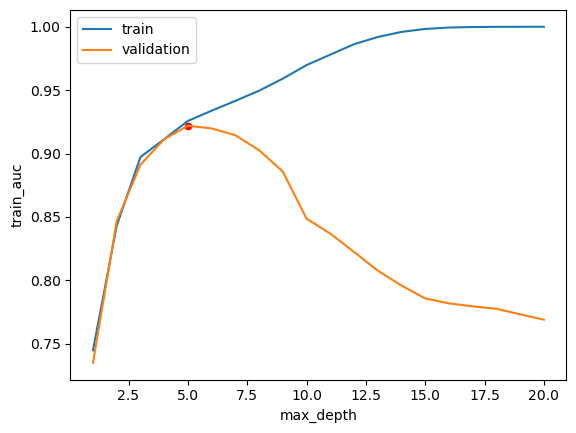

In [ ]:
sns.lineplot(data=score, x='max_depth', y='train_auc', label='train')
sns.lineplot(data=score, x='max_depth', y='val_auc', label='validation')
sns.scatterplot(data=optimum, x='max_depth', y='val_auc', color='red')

## Висновки 4

- На графіку можна чітко прослідкувати що з максимальної глибиною в 5 ми досягаємо найоптимальнішого результату. 
- При збільшенні к-ті вузлів наша валідаційна точність починає стрімко спадати та модель перенавчається.

**Завдання 5**.
1. Натренуйте модель `DecisionTree` з найкращим значенням `max_depth`, яке ви знайшли на попередній ітерації.
2. Завантажте тестові дані змагання з `test.csv`.
3. Зробіть попередню обробку даних з функцією `preprocess_new_data` з вашого модуля `process_bank_churn.py`.
4. Зробіть передбачення використовуючи цю модель на тестових даних змагання.
5. Сформуйте `submission.csv`.
6. Зробіть новий Submission на Kaggle і додайте тут скріншот Вашого скору на паблік лідерборді :)


In [ ]:
df_test = pd.read_csv(path + 'test.csv')
X_test = preprocess_new_data(df_test, preprocessed_data)
X_test.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Male
0,584.0,30.0,2.0,146053.66,1.0,1.0,1.0,157891.86,0.0,1.0,0.0,1.0
1,551.0,39.0,5.0,0.00,2.0,1.0,1.0,67431.28,1.0,0.0,0.0,1.0
2,706.0,43.0,8.0,0.00,2.0,1.0,0.0,156768.45,1.0,0.0,0.0,1.0
3,717.0,45.0,3.0,0.00,1.0,1.0,1.0,166909.87,0.0,0.0,1.0,1.0
4,592.0,43.0,8.0,0.00,2.0,1.0,1.0,143681.97,0.0,0.0,1.0,1.0


In [ ]:
model_final = DecisionTreeClassifier(max_depth=optimum['max_depth'].values[0], random_state = 42)
model_final.fit(preprocessed_data['train_X'], preprocessed_data['train_y'])
prob_test =  model_final.predict_proba(X_test)[:,1]

auc_train = roc_auc_score(preprocessed_data['train_y'], model_final.predict_proba(preprocessed_data['train_X'])[:,1])
auc_val = roc_auc_score(preprocessed_data['val_y'], model_final.predict_proba(preprocessed_data['val_X'])[:,1])
print(f"Train AUC: {auc_train}, Validation AUC: {auc_val}")

Train AUC: 0.9256944626530315, Validation AUC: 0.9219267439467729


<Axes: >

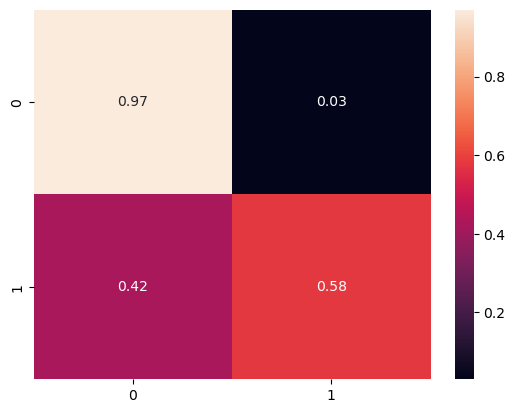

In [41]:
from sklearn.metrics import confusion_matrix

y_pred = model_final.predict(preprocessed_data['val_X'])

cm = confusion_matrix(preprocessed_data['val_y'], y_pred, normalize='true').round(2)
sns.heatmap(cm, annot=True, fmt='g')

In [ ]:
# df_submit = 
submit = pd.read_csv(path + 'sample_submission.csv')
submit['Exited'] = prob_test
submit.head()

,id,Exited
0,15000,0.237911
1,15001,0.027613
2,15002,0.027613
3,15003,0.770925
4,15004,0.027613


In [ ]:
submit.to_csv(path + 'submission_DT.csv', index=False)

C:\Users\Olhas\AppData\Local\Temp\ipykernel_13736\4115840443.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython.display
  from IPython.core.display import Image, display


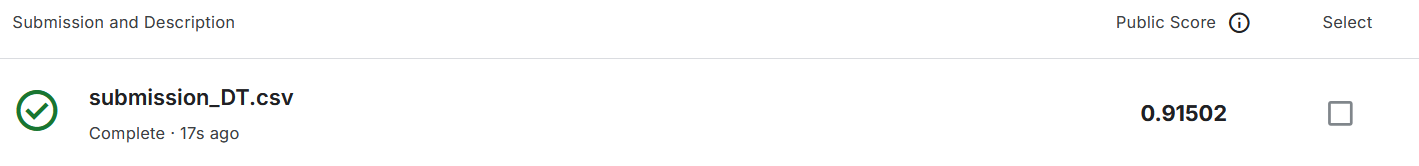

In [ ]:
from IPython.core.display import Image, display
display(Image('Kaggle_DT.png', width=900, unconfined=True))

## Висновки 5

|Model|Kaggle score|
|-----|-----|
|log regression|0.88680|
|Log.regres + polyn degree 3| 0.93347|
|Decision tree| 0.91502|

- Дерева прийняття рівень показують непоганий результат на змаганнях. 
- Вона значно кращі за звичайну логістичну регресію, але програють варіанту з поліноміальними фічами
- Тому в цілому для бізнесу це може бути  непогана модель завдяки своїй простоті та пояснювальності. Ми досягли гарного результату лише з глибиною 5, що зробить процес інтрпретації не дуже складним. Для банківської сфери це гарний варіант. Хоча confusion matrix для валідаційного набору все ще виглядає не дуже добре для класу 1 (але вже краще ніж класична логістична регресія)